In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the file
file_path = '/mnt/data/Assignment.xlsx'
excel_data = pd.ExcelFile('C:\\Users\\ABHISHEK\\Desktop\\Practice Extra\\Assignment.xlsx')

In [3]:
# Get the sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [4]:
# Load data from each sheet into a dataframe
user_details = excel_data.parse('UserDetails.csv')
cooking_sessions = excel_data.parse('CookingSessions.csv')
order_details = excel_data.parse('OrderDetails.csv')

In [5]:
# Display the first few rows of each dataset to understand their structure
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [6]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [7]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [8]:
# Check for missing values in all dataset
user_details.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [9]:
cooking_sessions.isnull().sum()

Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [10]:
order_details.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [11]:
# Fill missing ratings in the order_details
mean_rating = order_details['Rating'].mean()
order_details['Rating'].fillna(mean_rating, inplace = True)

In [12]:
# Confirm no missing values remain in OrderDetails
missing_values_order_details_updated = order_details.isnull().sum()
missing_values_order_details_updated

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          0
Session ID      0
dtype: int64

In [13]:
# Standardize column names to lowercase for consistency
user_details.columns = user_details.columns.str.strip().str.lower()
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower()
order_details.columns = order_details.columns.str.strip().str.lower()


In [14]:
# Merge the datasets
# Merge CookingSessions and OrderDetails based on common keys
merged_data = pd.merge(cooking_sessions, order_details, on = 'session id', how = 'inner')


In [15]:
# Merge with UserDetails to get complete information
final_data = pd.merge(merged_data, user_details, left_on='user id_x', right_on='user id', how='inner')

In [16]:
# Drop redundant columns after merge
final_data.drop(['user id_x', 'user id'], axis=1, inplace=True)


In [17]:
# Clean and transform data (Example: Handling missing values)
final_data.fillna({'rating': 0, 'session rating': 0}, inplace=True)


In [18]:
# Analyze popular dishes
popular_dishes = final_data["dish name_x"].value_counts().head(10)
print("Top 10 Popular Dishes:")
print(popular_dishes)

Top 10 Popular Dishes:
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: dish name_x, dtype: int64


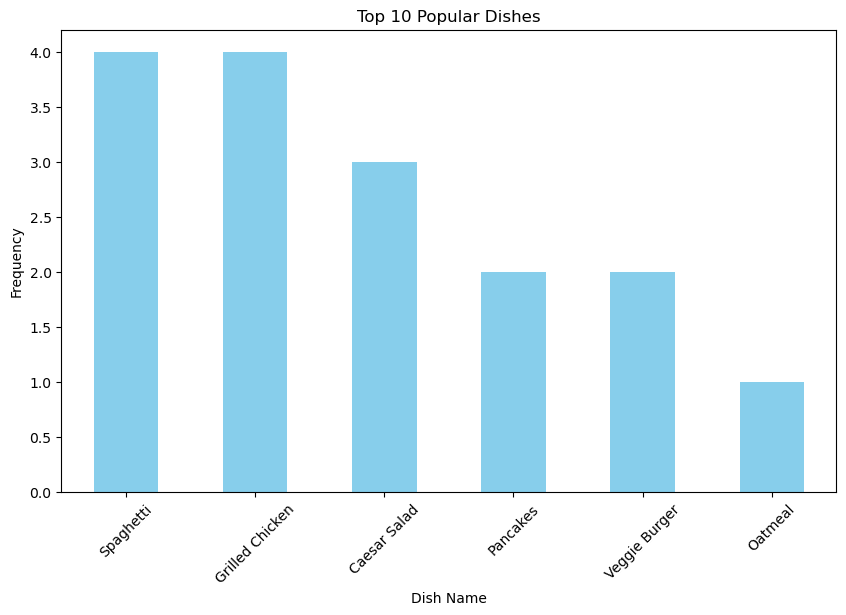

In [19]:
# Visualization: Top 10 Popular Dishes
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Analyze relationship between cooking sessions and user orders
session_order_correlation = final_data.groupby("user name").agg({
    "session rating": "mean",
    "rating": "mean",
    "amount (usd)": "sum"
}).reset_index()
print("Session and Order Correlation:")
print(session_order_correlation)

Session and Order Correlation:
       user name  session rating    rating  amount (usd)
0  Alice Johnson        4.533333  4.666667          35.0
1      Bob Smith        4.133333  4.000000          31.0
2    Charlie Lee        4.600000  4.190476          32.0
3    David Brown        4.700000  4.000000          21.5
4     Emma White        4.500000  4.000000          22.5
5    Frank Green        4.800000  5.000000          13.0
6     Grace King        5.000000  5.000000          14.0
7      Henry Lee        4.300000  4.000000          11.0


In [21]:
# Explore demographic factors influencing user behavior
location_analysis = final_data.groupby("location")["amount (usd)"].sum().sort_values(ascending=False).head(10)
print("Top Locations by Revenue:")
print(location_analysis)

Top Locations by Revenue:
location
New York         35.0
Chicago          32.0
Los Angeles      31.0
Seattle          22.5
San Francisco    21.5
Boston           14.0
Austin           13.0
Miami            11.0
Name: amount (usd), dtype: float64


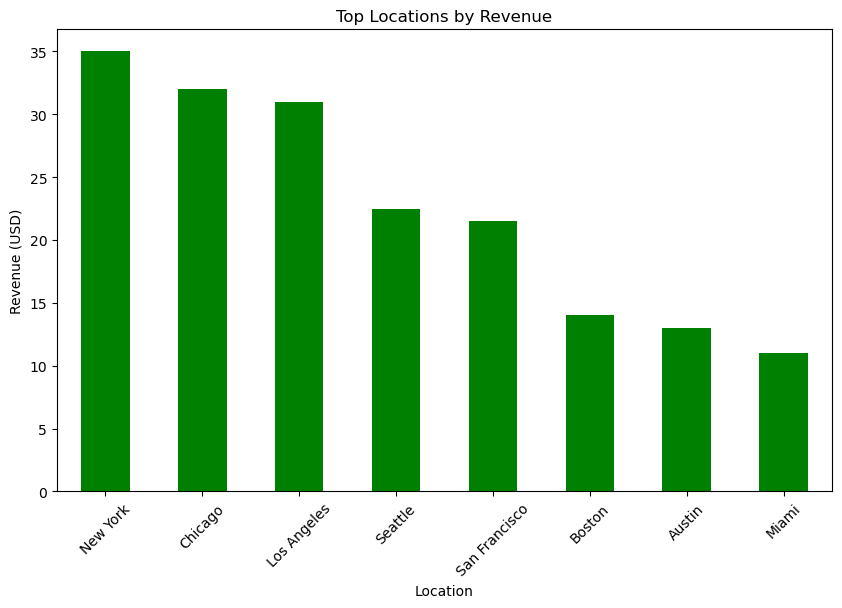

In [22]:
# Visualize location analysis
plt.figure(figsize=(10, 6))
location_analysis.plot(kind="bar", color="green")
plt.title("Top Locations by Revenue")
plt.xlabel("Location")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Analysis: Average Session Duration by Meal Type
avg_duration = final_data.groupby('meal type_x')['duration (mins)'].mean().sort_values()
print("\nAverage Session Duration by Meal Type:\n", avg_duration)


Average Session Duration by Meal Type:
 meal type_x
Lunch        21.000000
Breakfast    23.333333
Dinner       38.750000
Name: duration (mins), dtype: float64


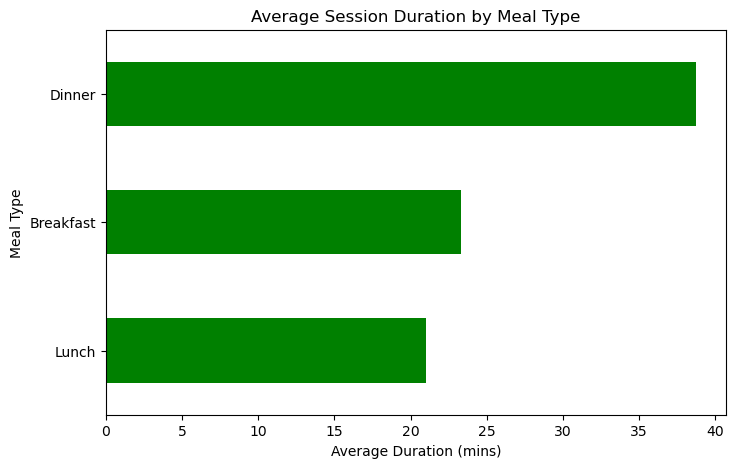

In [24]:
# Visualization: Average Session Duration by Meal Type
plt.figure(figsize=(8, 5))
avg_duration.plot(kind='barh', color='green')
plt.title('Average Session Duration by Meal Type')
plt.xlabel('Average Duration (mins)')
plt.ylabel('Meal Type')
plt.show()

In [25]:
# Analysis: User Demographics and Orders
orders_by_age = final_data.groupby('age')['order id'].nunique()
print("\nOrders by Age Group:\n", orders_by_age)



Orders by Age Group:
 age
25    1
27    2
28    3
30    2
31    1
35    3
38    1
42    3
Name: order id, dtype: int64


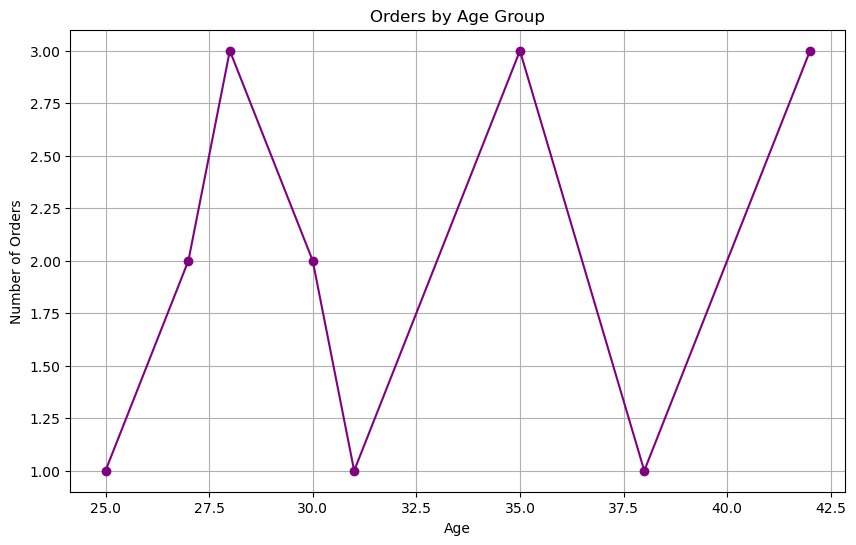

In [26]:
# Visualization: Orders by Age Group
plt.figure(figsize=(10, 6))
orders_by_age.plot(kind='line', marker='o', color='purple')
plt.title('Orders by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()